In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup as BS
import re
import time
import random

In [2]:
the_final_list = pd.read_csv('../data/the_final_list.csv')
the_final_list

,Unnamed: 0.2,Unnamed: 0.1,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,...,Book_Title,Director,imdb_rating,rating_count,metacritic_rating,awards,budget,world_wide_gross,currency,budget_currency
0,0,0,tt0120824,movie,The Shipping News,The Shipping News,0,2001,\N,111,...,The Shipping News,Lasse Hallström,6.7,35K,47.0,2 wins & 13 nominations total,38000000.0,24690441.0,$,$
1,1,1,tt0159365,movie,Cold Mountain,Cold Mountain,0,2003,\N,154,...,Cold Mountain,Anthony Minghella,7.2,163K,73.0,20 wins & 101 nominations total,79000000.0,173013509.0,$,$
2,2,2,tt0163025,movie,Jurassic Park Iii,Jurassic Park III,0,2001,\N,92,...,Jurassic Park,Joe Johnston,6.0,365K,42.0,5 wins & 16 nominations total,93000000.0,368780809.0,$,$
3,3,3,tt0164184,movie,The Sum Of All Fears,The Sum of All Fears,0,2002,\N,124,...,The Sum Of All Fears,Phil Alden Robinson,6.5,133K,45.0,2 wins & 5 nominations total,68000000.0,193921372.0,$,$
4,4,4,tt0164334,movie,Along Came A Spider,Along Came a Spider,0,2001,\N,104,...,Along Came A Spider,Lee Tamahori,6.4,103K,42.0,1 win & 1 nomination total,60000000.0,105178561.0,$,$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,127,127,tt6977240,movie,Starship Troopers: Traitor Of Mars,Starship Troopers: Traitor of Mars,0,2017,\N,88,...,Starship Troopers,Shinji Aramaki,5.5,6.9K,NaN,1 nomination total,NaN,NaN,NaN,NaN
128,128,128,tt7395114,movie,The Devil All The Time,The Devil All the Time,0,2020,\N,138,...,The Devil All The Time,Antonio Campos,7.1,166K,55.0,3 nominations total,NaN,NaN,NaN,NaN
129,129,129,tt7504726,movie,The Call Of The Wild,The Call of the Wild,0,2020,\N,100,...,The Call Of The Wild,Chris Sanders,6.7,63K,48.0,1 win & 8 nominations total,135000000.0,111166669.0,$,$
130,130,130,tt7657566,movie,Death On The Nile,Death on the Nile,0,2022,\N,127,...,Death On The Nile,Kenneth Branagh,6.3,207K,52.0,1 win & 8 nominations total,90000000.0,137307235.0,$,$


In [3]:
the_final_list = the_final_list.drop(columns=['Unnamed: 0.2', 'Unnamed: 0.1'])
the_final_list

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,Film_Title,...,Book_Title,Director,imdb_rating,rating_count,metacritic_rating,awards,budget,world_wide_gross,currency,budget_currency
0,tt0120824,movie,The Shipping News,The Shipping News,0,2001,\N,111,Drama,The Shipping News,...,The Shipping News,Lasse Hallström,6.7,35K,47.0,2 wins & 13 nominations total,38000000.0,24690441.0,$,$
1,tt0159365,movie,Cold Mountain,Cold Mountain,0,2003,\N,154,"Adventure,Drama,Romance",Cold Mountain,...,Cold Mountain,Anthony Minghella,7.2,163K,73.0,20 wins & 101 nominations total,79000000.0,173013509.0,$,$
2,tt0163025,movie,Jurassic Park Iii,Jurassic Park III,0,2001,\N,92,"Action,Adventure,Sci-Fi",Jurassic Park Iii,...,Jurassic Park,Joe Johnston,6.0,365K,42.0,5 wins & 16 nominations total,93000000.0,368780809.0,$,$
3,tt0164184,movie,The Sum Of All Fears,The Sum of All Fears,0,2002,\N,124,"Action,Drama,Thriller",The Sum Of All Fears,...,The Sum Of All Fears,Phil Alden Robinson,6.5,133K,45.0,2 wins & 5 nominations total,68000000.0,193921372.0,$,$
4,tt0164334,movie,Along Came A Spider,Along Came a Spider,0,2001,\N,104,"Crime,Drama,Mystery",Along Came A Spider,...,Along Came A Spider,Lee Tamahori,6.4,103K,42.0,1 win & 1 nomination total,60000000.0,105178561.0,$,$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,tt6977240,movie,Starship Troopers: Traitor Of Mars,Starship Troopers: Traitor of Mars,0,2017,\N,88,"Action,Animation,Fantasy",Starship Troopers: Traitor Of Mars,...,Starship Troopers,Shinji Aramaki,5.5,6.9K,NaN,1 nomination total,NaN,NaN,NaN,NaN
128,tt7395114,movie,The Devil All The Time,The Devil All the Time,0,2020,\N,138,"Crime,Drama,Thriller",The Devil All The Time,...,The Devil All The Time,Antonio Campos,7.1,166K,55.0,3 nominations total,NaN,NaN,NaN,NaN
129,tt7504726,movie,The Call Of The Wild,The Call of the Wild,0,2020,\N,100,"Adventure,Drama,Family",The Call Of The Wild,...,The Call Of The Wild,Chris Sanders,6.7,63K,48.0,1 win & 8 nominations total,135000000.0,111166669.0,$,$
130,tt7657566,movie,Death On The Nile,Death on the Nile,0,2022,\N,127,"Crime,Drama,Mystery",Death On The Nile,...,Death On The Nile,Kenneth Branagh,6.3,207K,52.0,1 win & 8 nominations total,90000000.0,137307235.0,$,$


In [6]:
the_final_list.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres', 'Film_Title',
       'Release_Date', 'Unnamed: 0', 'goodreads_book_id', 'best_book_id',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'average_rating', 'ratings_count', 'image_url',
       'small_image_url', 'Author', 'Publication_Date', 'Book_Title_Cleaned',
       'Book_Title', 'Director', 'imdb_rating', 'rating_count',
       'metacritic_rating', 'awards', 'budget', 'world_wide_gross', 'currency',
       'budget_currency'],
      dtype='object')

In [5]:
the_final_list.groupby('startYear').originalTitle.count()

startYear
2001     6
2002    12
2003    11
2004    10
2005     9
2006     8
2007     5
2008     8
2009     5
2010     9
2011     6
2012     4
2013     7
2014     2
2015     4
2016     4
2017     2
2018     4
2019     2
2020     4
2021     1
2022     2
2023     4
2024     2
2026     1
Name: originalTitle, dtype: int64

In [7]:
the_final_list.groupby('Publication_Date').originalTitle.count()

Publication_Date
1813    1
1876    2
1877    1
1880    1
1889    1
1894    3
1903    2
1904    1
1912    3
1915    1
1925    3
1927    1
1937    1
1945    1
1946    1
1947    1
1950    3
1952    1
1953    2
1954    2
1955    1
1959    3
1961    1
1962    2
1965    2
1966    1
1968    1
1971    3
1972    1
1974    2
1977    3
1980    1
1981    1
1982    2
1983    2
1987    2
1988    1
1990    3
1991    1
1992    2
1993    2
1995    1
1996    3
1997    1
1998    5
1999    6
2000    4
2001    7
2002    3
2003    5
2005    7
2006    5
2007    2
2008    8
2009    1
2010    1
2011    1
2012    1
2013    1
2016    1
Name: originalTitle, dtype: int64

In [8]:
the_final_list.Publication_Date.nunique()

60

In [10]:
the_final_list.groupby('Book_Title').originalTitle.count().sort_values()

Book_Title
A Connecticut Yankee In King Arthur'S Court    1
A Painted House                                1
A Scanner Darkly                               1
A Walk To Remember                             1
A Widow For One Year                           1
                                              ..
The Exorcist                                   3
The Jungle Books                               3
The Chronicles Of Narnia                       3
Twilight                                       3
The Hunger Games                               6
Name: originalTitle, Length: 106, dtype: int64

In [12]:
small_list = the_final_list[['Book_Title_Cleaned', 'Author', 'Publication_Date', 'average_rating', 'Film_Title', 'Release_Date', 'imdb_rating', 'metacritic_rating', 'budget', 'budget_currency', 'world_wide_gross', 'currency']]
small_list

,Book_Title_Cleaned,Author,Publication_Date,average_rating,Film_Title,Release_Date,imdb_rating,metacritic_rating,budget,budget_currency,world_wide_gross,currency
0,The Shipping News,Annie Proulx,1993,3.83,The Shipping News,2001,6.7,47.0,38000000.0,$,24690441.0,$
1,Cold Mountain,Charles Frazier,1997,3.83,Cold Mountain,2003,7.2,73.0,79000000.0,$,173013509.0,$
2,Jurassic Park,Michael Crichton,1990,3.96,Jurassic Park Iii,2001,6.0,42.0,93000000.0,$,368780809.0,$
3,The Sum Of All Fears,Tom Clancy,1991,3.99,The Sum Of All Fears,2002,6.5,45.0,68000000.0,$,193921372.0,$
4,Along Came A Spider,James Patterson,1993,4.08,Along Came A Spider,2001,6.4,42.0,60000000.0,$,105178561.0,$
...,...,...,...,...,...,...,...,...,...,...,...,...
127,Starship Troopers,Robert A. Heinlein,1959,3.99,Starship Troopers: Traitor Of Mars,2017,5.5,NaN,NaN,NaN,NaN,NaN
128,The Devil All The Time,Donald Ray Pollock,2011,4.09,The Devil All The Time,2020,7.1,55.0,NaN,NaN,NaN,NaN
129,The Call Of The Wild,Jack London,1903,3.83,The Call Of The Wild,2020,6.7,48.0,135000000.0,$,111166669.0,$
130,Death On The Nile,Agatha Christie,1937,4.06,Death On The Nile,2022,6.3,52.0,90000000.0,$,137307235.0,$


In [13]:
def currency_converter(money):
    if money == '$':
        return 1.0
    elif money == '£':
        return 1.35
    elif money == '€':
        return 1.17

In [14]:
small_list[small_list.budget_currency != small_list.currency]

,Book_Title_Cleaned,Author,Publication_Date,average_rating,Film_Title,Release_Date,imdb_rating,metacritic_rating,budget,budget_currency,world_wide_gross,currency
8,Tales Of The South Pacific,James A. Michener,1947,4.03,South Pacific,2001,5.7,NaN,15000000.0,$,NaN,NaN
17,A Wrinkle In Time,Madeleine L'Engle,1962,4.04,A Wrinkle In Time,2003,5.6,NaN,NaN,NaN,NaN,NaN
18,The Great Gatsby,F. Scott Fitzgerald,1925,3.89,G,2002,5.2,42.0,NaN,NaN,3020784.0,$
19,The Rules Of Attraction,Bret Easton Ellis,1987,3.71,The Rules Of Attraction,2002,NaN,NaN,NaN,NaN,NaN,NaN
26,Carrie,Stephen King,1974,3.93,Carrie,2002,5.4,NaN,NaN,NaN,NaN,NaN
34,The Other Boleyn Girl,Philippa Gregory,2001,4.04,The Other Boleyn Girl,2003,6.1,NaN,NaN,NaN,NaN,NaN
35,Fahrenheit 451,Ray Bradbury,1953,3.97,Fahrenheit 451,2018,5.0,NaN,NaN,NaN,NaN,NaN
36,A Painted House,John Grisham,2001,3.67,A Painted House,2003,6.5,NaN,NaN,NaN,NaN,NaN
47,Back When We Were Grownups,Anne Tyler,2001,3.51,Back When We Were Grownups,2004,6.1,NaN,NaN,NaN,NaN,NaN
51,The Five People You Meet In Heaven,Mitch Albom,2003,3.90,The Five People You Meet In Heaven,2004,7.2,NaN,20000000.0,$,NaN,NaN


In [15]:
small_list.groupby('currency').Film_Title.count()

currency
$    111
Name: Film_Title, dtype: int64

In [16]:
small_list.groupby('budget_currency').Film_Title.count()

budget_currency
$    107
£      1
€      1
Name: Film_Title, dtype: int64

In [17]:
small_list.groupby('Release_Date').world_wide_gross.sum()

Release_Date
2001    8.903183e+08
2002    8.526360e+08
2003    8.189226e+08
2004    6.361008e+08
2005    1.161667e+09
2006    1.837847e+09
2007    1.273006e+09
2008    1.071656e+09
2009    1.393302e+09
2010    2.082909e+09
2011    7.876774e+08
2012    1.403788e+09
2013    1.706171e+09
2014    7.588463e+08
2015    2.345538e+09
2016    1.420352e+09
2017    6.892818e+07
2018    1.441242e+09
2019    1.855035e+08
2020    1.238350e+08
2021    4.106685e+08
2022    1.523465e+08
2023    5.670049e+08
2024    7.153040e+08
2026    0.000000e+00
Name: world_wide_gross, dtype: float64

<Axes: xlabel='Release_Date'>

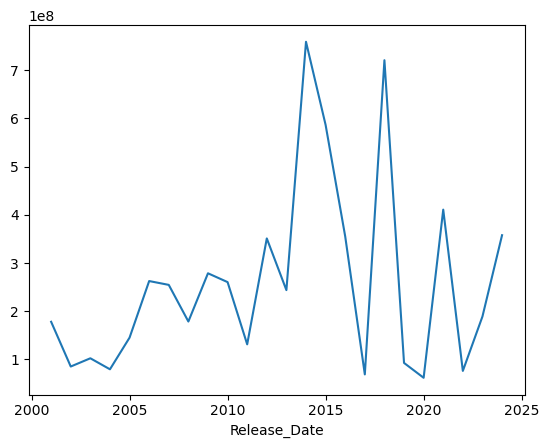

In [35]:
small_list.groupby('Release_Date').world_wide_gross.mean().plot(kind='line')

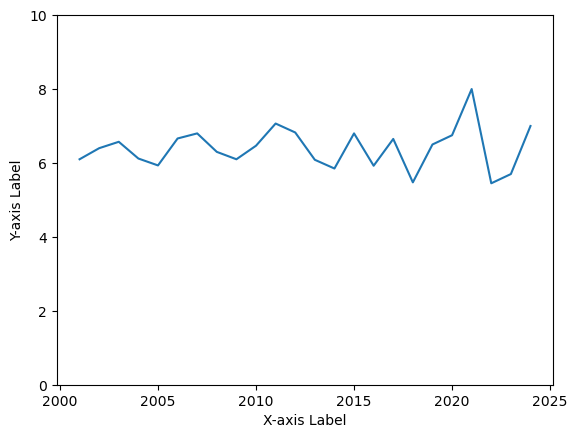

In [29]:
ax = small_list.groupby('Release_Date').imdb_rating.mean().plot(kind='line')

ax.set_ylim(0, 10)

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

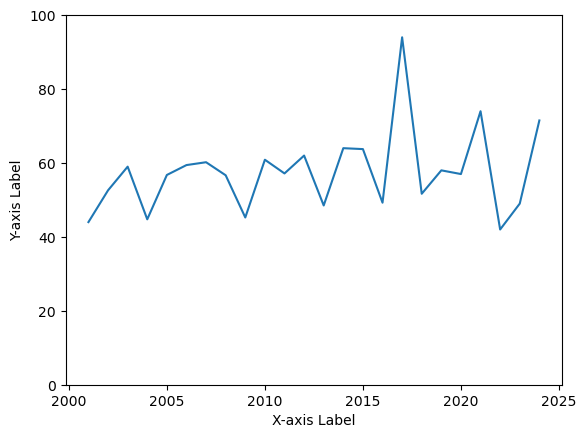

In [30]:
ax = small_list.groupby('Release_Date').metacritic_rating.mean().plot(kind='line')

ax.set_ylim(0, 100)

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

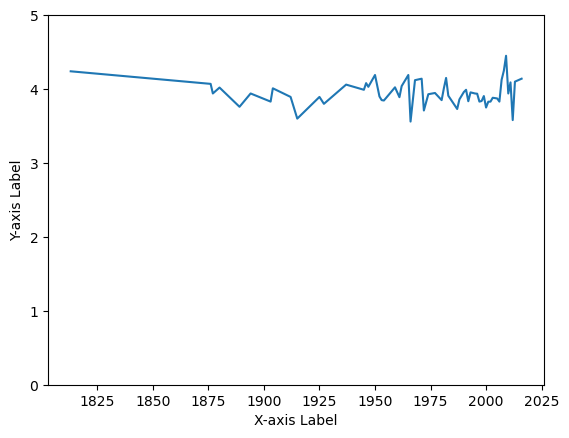

In [31]:
ax = small_list.groupby('Publication_Date').average_rating.mean().plot(kind='line')

ax.set_ylim(0, 5)

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

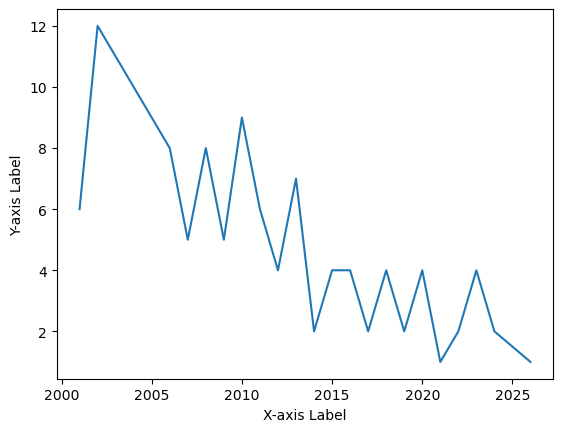

In [34]:
ax = small_list.groupby('Release_Date').Film_Title.count().plot(kind='line')

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

In [36]:
small_list.dtypes

Book_Title_Cleaned     object
Author                 object
Publication_Date        int64
average_rating        float64
Film_Title             object
Release_Date            int64
imdb_rating           float64
metacritic_rating     float64
budget                float64
budget_currency        object
world_wide_gross      float64
currency               object
dtype: object

In [37]:
small_list['time_to_adapt'] = small_list.Release_Date - small_list.Publication_Date

C:\Users\erics\AppData\Local\Temp\ipykernel_33712\288708409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_list['time_to_adapt'] = small_list.Release_Date - small_list.Publication_Date


In [38]:
small_list['imdb_book_diff'] = small_list.imdb_rating - small_list.average_rating*2
small_list['metacritic_book_diff'] = small_list.metacritic_rating/10 - small_list.average_rating*2
small_list

C:\Users\erics\AppData\Local\Temp\ipykernel_33712\1925705820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_list['imdb_book_diff'] = small_list.imdb_rating - small_list.average_rating*2
C:\Users\erics\AppData\Local\Temp\ipykernel_33712\1925705820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_list['metacritic_book_diff'] = small_list.metacritic_rating/10 - small_list.average_rating*2


,Book_Title_Cleaned,Author,Publication_Date,average_rating,Film_Title,Release_Date,imdb_rating,metacritic_rating,budget,budget_currency,world_wide_gross,currency,time_to_adapt,imdb_book_diff,metacritic_book_diff
0,The Shipping News,Annie Proulx,1993,3.83,The Shipping News,2001,6.7,47.0,38000000.0,$,24690441.0,$,8,-0.96,-2.96
1,Cold Mountain,Charles Frazier,1997,3.83,Cold Mountain,2003,7.2,73.0,79000000.0,$,173013509.0,$,6,-0.46,-0.36
2,Jurassic Park,Michael Crichton,1990,3.96,Jurassic Park Iii,2001,6.0,42.0,93000000.0,$,368780809.0,$,11,-1.92,-3.72
3,The Sum Of All Fears,Tom Clancy,1991,3.99,The Sum Of All Fears,2002,6.5,45.0,68000000.0,$,193921372.0,$,11,-1.48,-3.48
4,Along Came A Spider,James Patterson,1993,4.08,Along Came A Spider,2001,6.4,42.0,60000000.0,$,105178561.0,$,8,-1.76,-3.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Starship Troopers,Robert A. Heinlein,1959,3.99,Starship Troopers: Traitor Of Mars,2017,5.5,NaN,NaN,NaN,NaN,NaN,58,-2.48,NaN
128,The Devil All The Time,Donald Ray Pollock,2011,4.09,The Devil All The Time,2020,7.1,55.0,NaN,NaN,NaN,NaN,9,-1.08,-2.68
129,The Call Of The Wild,Jack London,1903,3.83,The Call Of The Wild,2020,6.7,48.0,135000000.0,$,111166669.0,$,117,-0.96,-2.86
130,Death On The Nile,Agatha Christie,1937,4.06,Death On The Nile,2022,6.3,52.0,90000000.0,$,137307235.0,$,85,-1.82,-2.92
